In [1]:
# Libraries and utilities

import math
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.metrics import davies_bouldin_score



from collections import defaultdict



In [2]:

#Clustering utilities

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score,silhouette_samples

import matplotlib.pyplot as plt
import matplotlib.cm as cm

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
import pandas as pd

# Specifica il percorso completo del file CSV
file_path = ('df_clean.csv')

# Leggi il file CSV
df = pd.read_csv(file_path)

In [4]:
def get_linkage_matrix(model):
    # Create linkage matrix 
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

def plot_dendrogram(model, **kwargs):
    linkage_matrix = get_linkage_matrix(model)
    dendrogram(linkage_matrix, **kwargs)

In [5]:
df_clus= df[['duration_ms','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','popularity','liveness','tempo','processing','speechiness', 'time_signature']]


In [7]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                metric='euclidean', linkage='complete')
model = model.fit(X_minmax)

NameError: name 'X_minmax' is not defined

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Supponiamo che tu abbia già definito X (i tuoi dati)

# Creazione del MinMaxScaler e normalizzazione dei dati
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# Creazione e addestramento del modello
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='complete')
model.fit(X_minmax)



AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

In [10]:
X = df_clus
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [12]:
import matplotlib.pyplot as plt

# Estrai i punteggi di silhouette e i parametri per ogni risultato
silhouette_scores = [res['silu'] for res in results]
cluster_numbers = [res['k'] for res in results]
linkage_methods = [res['link'] for res in results]
distance_metrics = [res['metric'] for res in results]

# Crea un DataFrame per semplificare l'analisi
import pandas as pd
data = {
    'Cluster Number': cluster_numbers,
    'Linkage Method': linkage_methods,
    'Distance Metric': distance_metrics,
    'Silhouette Score': silhouette_scores
}
df_results = pd.DataFrame(data)

# Visualizzazione dei punteggi di silhouette in base ai parametri
plt.figure(figsize=(12, 6))

# Puoi utilizzare un grafico a barre raggruppate per confrontare i punteggi di silhouette
for linkage_method in df_results['Linkage Method'].unique():
    for distance_metric in df_results['Distance Metric'].unique():
        subset = df_results[(df_results['Linkage Method'] == linkage_method) &
                            (df_results['Distance Metric'] == distance_metric)]
        plt.bar(subset['Cluster Number'], subset['Silhouette Score'],
                label=f'{linkage_method} - {distance_metric}', alpha=0.7)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Configurations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'results' is not defined

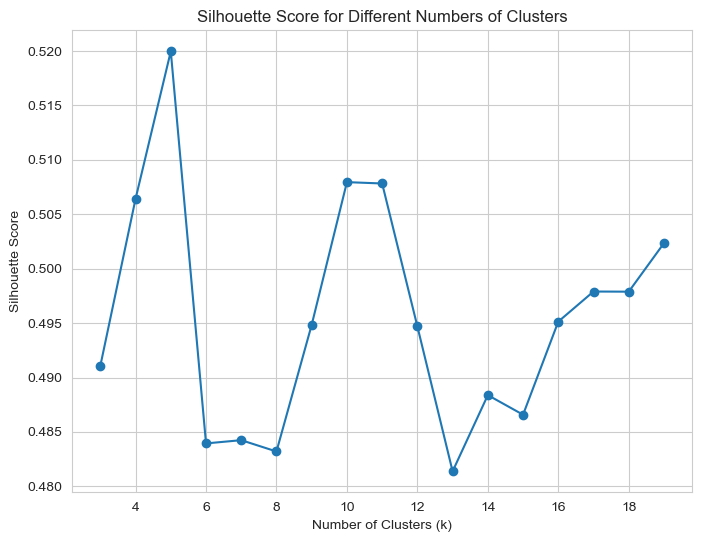

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lista vuota per i punteggi di silhouette
silhouette_scores = []

# Prova valori di k da 2 a 10 (puoi regolare questo intervallo in base alle tue esigenze)
for k in range(3, 20):
    # Crea un oggetto di clustering gerarchico
    clustering = AgglomerativeClustering(n_clusters=k)
    
    # Addestra il modello
    cluster_labels = clustering.fit_predict(X)  # X è il tuo dataset
    
    # Calcola il punteggio di silhouette per questo valore di k
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualizza il grafico del metodo del gomito
plt.figure(figsize=(8, 6))
plt.plot(range(3, 20), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

In [11]:
# Prova diversi numeri di cluster e calcola il punteggio silhouette per ognuno
for n_clusters in range(2, 11):  # Prova da 2 a 10 cluster per esempio
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={n_clusters}, silhouette score is {silhouette_avg}")

For n_clusters=2, silhouette score is 0.6080700035774983
For n_clusters=3, silhouette score is 0.4910727686157047
For n_clusters=4, silhouette score is 0.5064205026814333
For n_clusters=5, silhouette score is 0.5199731557495793
For n_clusters=6, silhouette score is 0.4839430540259584
For n_clusters=7, silhouette score is 0.4842423932331145
For n_clusters=8, silhouette score is 0.48320167890719196
For n_clusters=9, silhouette score is 0.49484303780298017
For n_clusters=10, silhouette score is 0.5079525281591533


In [13]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='complete')
model = model.fit(X)

In [14]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_1384\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


8763     1
4704     1
4454     1
7006     1
7032     1
        ..
10120    1
11554    1
10343    1
10639    1
0        1
Name: count, Length: 14527, dtype: int64

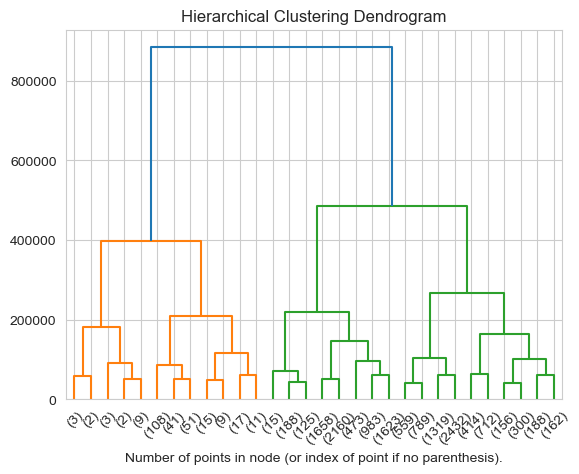

In [14]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [15]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='single')
model = model.fit(X)

In [16]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_1384\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


12137    1
8652     1
2492     1
3536     1
4306     1
        ..
12904    1
10741    1
8596     1
8582     1
0        1
Name: count, Length: 14527, dtype: int64

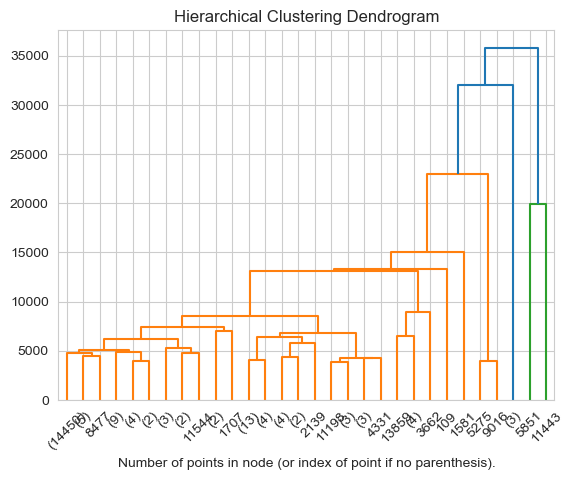

In [17]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [17]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='average')
model = model.fit(X)

In [18]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_1384\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


8162     1
9589     1
8437     1
6175     1
6711     1
        ..
9720     1
11374    1
9971     1
7212     1
0        1
Name: count, Length: 14527, dtype: int64

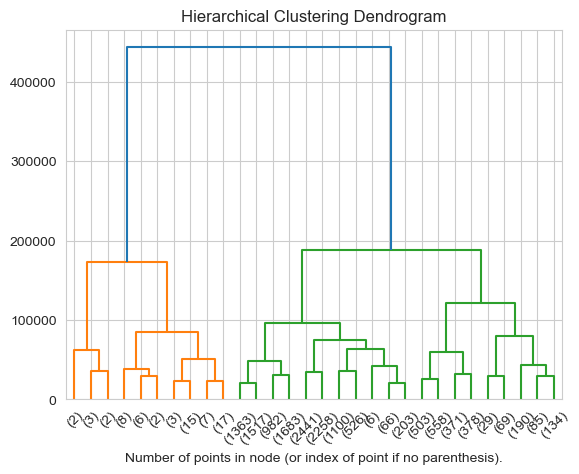

In [20]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Linkage average provo con 10 cluster

In [21]:
model = AgglomerativeClustering( n_clusters=10, metric='euclidean', linkage='average')
model = model.fit(X)
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\3015586839.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


5    5545
8    4699
1    1810
9    1626
3     409
4     275
7      98
2      42
6      16
0       7
Name: count, dtype: int64
silhouette 0.48092968140778286


In [23]:
# Individua i cluster dominanti
dominant_clusters = [5,8,1,9]

# Filtra i punti nei cluster dominanti
dominant_points = X[model.labels_ == dominant_clusters[0]]  # Prendiamo inizialmente il primo cluster dominante

# Visualizza le caratteristiche dei punti nei cluster dominanti (esempio: prime 5 righe)
print("Caratteristiche dei punti nei cluster dominanti:")
print(pd.DataFrame(dominant_points, columns=df_clus.columns).head())

Caratteristiche dei punti nei cluster dominanti:
   duration_ms  acousticness  instrumentalness  loudness  valence  \
0       241760      0.302000          0.536000   -12.529    0.635   
3       269800      0.066400          0.001270    -5.607    0.385   
4       307651      0.000576          0.096900   -11.340    0.637   
5       224266      0.001520          0.000024    -3.047    0.421   
6       225160      0.306000          0.000016    -2.488    0.850   

   danceability  energy  n_beats  popularity  liveness    tempo  processing  \
0         0.690   0.513    567.0          46     0.281  142.221    1.279305   
3         0.523   0.585    619.0          23     0.117  140.880    1.279305   
4         0.643   0.687    733.0          25     0.299  143.956    4.067086   
5         0.642   0.972    432.0          32     0.384  118.035    1.279305   
6         0.777   0.949    411.0          27     0.299  109.992    3.700483   

   speechiness  time_signature  
0       0.0975             4

In [25]:
# Individua i cluster minoritari
minority_clusters = [3,4,7,6,0]

# Filtra i punti nei cluster minoritari
minority_points = X_scal[model.labels_ == minority_clusters[0]]  # Prendiamo inizialmente il primo cluster minoritario

# Visualizza le caratteristiche dei punti nei cluster minoritari (esempio: prime 5 righe)
print("\nCaratteristiche dei punti nei cluster minoritari:")
print(pd.DataFrame(minority_points, columns=df_clus.columns).head())


Caratteristiche dei punti nei cluster minoritari:
   duration_ms  acousticness  instrumentalness  loudness   valence  \
0     2.107086     -0.053201          1.686917 -2.719117 -1.465659   
1     2.772036     -0.913754         -0.506006  0.320976  0.973534   
2     2.267396     -0.914596          1.587785 -0.597182 -1.051894   
3     2.913387     -0.899798          1.564306 -0.050906 -0.270657   
4     2.092783     -0.451950          1.269516  0.111941  0.217615   

   danceability    energy   n_beats  popularity  liveness     tempo  \
0     -2.514929 -1.762705  0.538453   -1.475957  0.748330 -1.499275   
1      1.726021 -0.254933  2.564960   -1.100155 -0.826210  0.167724   
2      0.686572  0.144855  2.043242   -1.046469 -0.756403  0.218561   
3      0.681375 -0.209243  2.474414    1.530460 -0.877402 -0.002440   
4      1.315439 -0.167360  1.750046   -1.261213 -0.585763 -0.032090   

   processing  speechiness  time_signature  
0    0.137992     0.045776        0.197951  
1   -0.7584

In [26]:
model = AgglomerativeClustering( n_clusters=5, metric='euclidean', linkage='average')
model = model.fit(X)
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\4116738746.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


0    12145
4     1810
2      507
1       58
3        7
Name: count, dtype: int64
silhouette 0.5233860355123509


In [48]:
model = AgglomerativeClustering( n_clusters=4, metric='euclidean', linkage='average')
model = model.fit(X)
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\3075201059.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


2    12145
0     2317
1       58
3        7
Name: count, dtype: int64
silhouette 0.5878189957024191


In [27]:
#Precalcolo matrice delle distanze

dist = pdist(X_scal, 'euclidean') # usiamo la distanza euclidea
dist = squareform(dist) #miglior formattazione della matrice

In [28]:
model = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
model = model.fit(dist)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\116405284.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


0    13518
1      767
3      139
4       88
2       15
Name: count, dtype: int64
silhouette 0.16717954197399176


Un valore vicino a +1 indica che i campioni sono stati assegnati a cluster appropriati.
Un valore vicino a 0 indica che i campioni potrebbero essere al confine tra due cluster.
Un valore vicino a -1 indica che i campioni potrebbero essere stati assegnati al cluster sbagliato.

 i campioni potrebbero essere al confine tra i cluster, ma potrebbero non essere assegnati in modo ottimale. 

In [31]:
model = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='complete')
model = model.fit(dist)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\116405284.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


1    9459
8    1838
3     936
9     750
2     731
6     535
0     139
4      88
7      36
5      15
Name: count, dtype: int64
silhouette 0.06841806113845832


ovrapposizione considerevole o una cattiva assegnazione dei campioni ai cluster stessi.

In [41]:
model = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='complete')
model = model.fit(dist)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [42]:
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\116405284.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


1    13518
3      767
0      227
2       15
Name: count, dtype: int64
silhouette 0.1685466194088882


In [43]:
model = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete')
model = model.fit(dist)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
model = model.fit(dist)
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\1090328228.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


0    14285
1      227
2       15
Name: count, dtype: int64
silhouette 0.3620992969579089


esperimento ward Il metodo ‘ward’ mira a formare cluster compatti e di dimensioni relativamente uniformi minimizzando la varianza tra i cluster.

In [49]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                                linkage='ward')
model = model.fit(X_scal)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [50]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


8723     1
5597     1
6921     1
11562    1
7259     1
        ..
10399    1
14206    1
14281    1
10404    1
0        1
Name: count, Length: 14527, dtype: int64

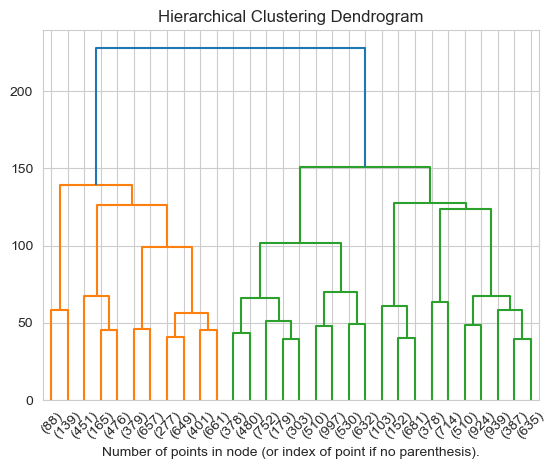

In [51]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [62]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                linkage='ward')
model = model.fit(X_scal)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [63]:

print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\410223421.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


2    4761
1    4487
0    4116
4     936
3     227
Name: count, dtype: int64
silhouette 0.09267085003510757


Esperimento ward + connectivity(neighbors=100)

In [64]:
# hierarchical clustering
from sklearn.neighbors import kneighbors_graph


connectivity = kneighbors_graph(X_scal, n_neighbors=100, include_self=False)

In [65]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                                linkage='ward', connectivity=connectivity)
model = model.fit(X_scal)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


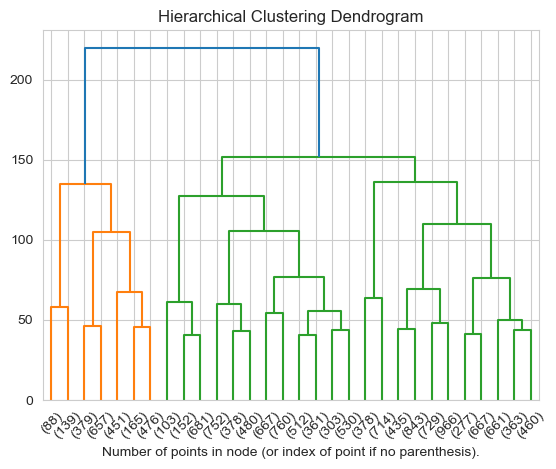

In [66]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [93]:

ward = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 5679, 1: 5401, 2: 2128, 3: 1092, 4: 227}
silhouette 0.08990055747030032


In [75]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',
                                linkage='ward')
model = model.fit(X_scal)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [76]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


2    4761
1    4487
0    4116
4     936
3     227
Name: count, dtype: int64

In [78]:
print('silhouette', silhouette_score(X_scal, model.labels_))

silhouette 0.09267085003510757


In [79]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                linkage='ward')
model = model.fit(X_scal)

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [80]:
pd.value_counts(model.labels_)

C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\271339660.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(model.labels_)


0    5423
2    4761
1    4116
3     227
Name: count, dtype: int64

In [81]:
print('silhouette', silhouette_score(X_scal, model.labels_))

silhouette 0.08871126422332164


In [ ]:
##Esperimento complete + connectivity

In [82]:
ward = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 4, 1: 14482, 2: 2, 3: 12, 4: 27}
silhouette 0.45861209894090965


In [86]:
ward = AgglomerativeClustering(n_clusters=5, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 14432, 1: 3, 2: 88, 3: 2, 4: 2}
silhouette 0.4567259646741273


In [88]:
ward = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 14434, 1: 3, 2: 88, 3: 2}
silhouette 0.4896314229930771


In [89]:
ward = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 4, 1: 14482, 2: 2, 3: 12, 4: 27}
silhouette 0.45861209894090965


In [90]:
ward = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 14509, 1: 4, 2: 2, 3: 12}
silhouette 0.45834973590682876


In [94]:

model = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
model = model.fit(dist)
print(pd.value_counts(model.labels_))
print('silhouette', silhouette_score(X_scal, model.labels_))

C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\Alma\AppData\Local\Temp\ipykernel_25472\4284097514.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(model.labels_))


0    13518
1      767
3      139
4       88
2       15
Name: count, dtype: int64
silhouette 0.16717954197399176


In [97]:
ward = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_scal)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(X_scal, ward.labels_))
     


C:\Users\Alma\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 14434, 1: 3, 2: 88, 3: 2}
silhouette 0.4896314229930771


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Considera di aver già caricato o creato il tuo DataFrame 'df'
df_clus = df[['duration_ms','acousticness', 'instrumentalness', 'loudness', 'valence', 'danceability', 'energy', 'n_beats','popularity','liveness','tempo','processing','speechiness', 'time_signature']]

# Preprocessa i dati se necessario
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clus)

# Calcola la matrice delle distanze usando il metodo di linkage desiderato
# Puoi scegliere il metodo di linkage tra 'ward', 'complete', 'average', ecc.
linked = linkage(data_scaled, method='ward')

# Crea il dendrogramma
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramma per il Clustering Gerarchico')
plt.xlabel('Indici dei campioni')
plt.ylabel('Distanza Euclidea')
plt.show()


KeyboardInterrupt: 